In [1]:
# import modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import gsblr
import plotnine as p9

In [2]:
# import data
X_train = np.loadtxt('data/small_model/X_train.txt', delimiter=',')
y_train = np.loadtxt('data/small_model/y_train.txt', delimiter=',')
X_test = np.loadtxt('data/small_model/X_test.txt', delimiter=',')
y_test = np.loadtxt('data/small_model/y_test.txt', delimiter=',')

betas = np.loadtxt('data/small_model/betas.txt', delimiter=',')

### Linear Regression

In [3]:
# fit linear regression model
linreg_model = LinearRegression().fit(X_train, y_train)

# linear regression coefficients
linreg_coef = linreg_model.coef_

# predict with linreg model
linreg_pred = linreg_model.predict(X_test)

# MSE for linreg model
linreg_mse = mean_squared_error(y_test, linreg_pred)

### Ridge

In [4]:
# fit ridge regression model with cross validation
ridge_model = RidgeCV().fit(X_train, y_train)

# ridge "alpha" parameter (lambda)
ridge_model.alpha_ 

10.0

In [5]:
# ridge coefficients
ridge_coef = ridge_model.coef_

# predict with ridge model
ridge_pred = ridge_model.predict(X_test)

# MSE for ridge model
ridge_mse = mean_squared_error(y_test, ridge_pred)

### LASSO

In [6]:
# fit lasso regression model with cross validation
lasso_model = LassoCV(random_state=141).fit(X_train, y_train)

# lasso "alpha" parameter (lambda)
lasso_model.alpha_ 

0.923956785933777

In [7]:
# lasso coefficients
lasso_coef = lasso_model.coef_

# predict with lasso model
lasso_pred = lasso_model.predict(X_test)

# MSE for lasso model
lasso_mse = mean_squared_error(y_test, lasso_pred)

### Gibbs

In [8]:
# initialize gibbs sampler
gibbs = gsblr.Gsblr(rseed=141)

# fit gibbs sampler
gibbs.fit(X_train, y_train)

# gibbs coefficients
gibbs_coef = gibbs.get_coef().values

# predict with gibbs
gibbs_pred = gibbs.predict(X_test)

# MSE for gibbs
gibbs_mse = mean_squared_error(y_test, gibbs_pred)

### Data Summary

In [9]:
# create dataframe of all regression coefficients
coef_df = pd.DataFrame({'true_coef': betas,
                        'linreg_coef': linreg_coef,
                        'ridge_coef': ridge_coef,
                        'lasso_coef': lasso_coef,
                        'gibbs_coef': gibbs_coef}
                        )

coef_df

,true_coef,linreg_coef,ridge_coef,lasso_coef,gibbs_coef
0,7.0,6.945047,6.942184,6.938708,6.943393
1,1.0,0.970877,0.970560,0.961613,0.968138
2,0.0,0.833671,0.796489,0.000000,0.581158
3,4.0,3.980728,3.980158,3.977486,3.981427
4,3.0,2.920467,2.910189,2.814856,2.911239
5,0.0,0.491147,0.443575,0.000000,-0.253574


In [10]:
# create dataframe of MSE for each model
mse_df = pd.Series(data=[linreg_mse, ridge_mse, lasso_mse, gibbs_mse],
                   index= ['linreg_mse', 'ridge_mse', 'lasso_mse', 'gibbs_mse'])

mse_df

linreg_mse    84.387118
ridge_mse     84.344407
lasso_mse     83.401259
gibbs_mse     83.736562
dtype: float64

In [15]:
# dataframe of gibbs samples (excluding burned samples)
gibbs_samples = gibbs.get_samples()

# save to csv
gibbs_samples.to_csv('gibbs_samples.csv')
coef_df.to_csv('coefs_data.csv')

### Histograms of Estimated Coefficients from Gibbs Samples

C:\Users\riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.


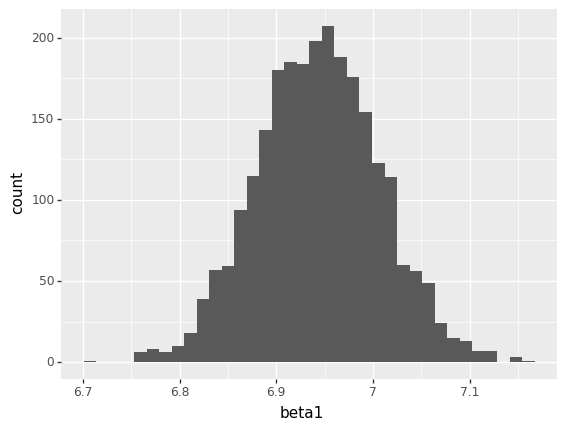

<ggplot: (100164828608)>

In [12]:
(
    p9.ggplot(gibbs_samples, p9.aes(x='beta1'))
    + p9.geom_histogram()
)

In [13]:
gibbs_samples.hist(column='beta1')

array([[<AxesSubplot:title={'center':'beta1'}>]], dtype=object)

In [14]:
# histogram for beta1

gibbs_samples['beta1'].values

array([7.00038594, 6.92561466, 7.01475574, ..., 7.04145871, 6.84295673,
       6.90663026])